


### 1\. Load the Dataset

First, we load the data into your environment. We'll use the pandas library, which is perfect for handling datasets like this.

In [7]:
import pandas as pd
import numpy as np

# Load the dataset
# Ensure the 'application_data.csv' file is in the same directory as your script
try:
    df = pd.read_csv("loan_data.csv")
    print("Dataset loaded successfully!")
    print("Shape of the dataset:", df.shape)
except FileNotFoundError:
    print("Error: 'application_data.csv' not found. Please check the file path.")

# Display the first few rows to understand the data
print(df.head())

Dataset loaded successfully!
Shape of the dataset: (307511, 122)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCU

-----

### 2\. Check for Null (Missing) Values

Real-world data is often messy and contains missing values. Identifying them is a crucial first step in data cleaning.

In [8]:
# Calculate the percentage of null values for each column
null_values = df.isnull().sum()
null_percentage = (null_values / len(df)) * 100

# Display columns with a high percentage of missing values (e.g., > 40%)
print("Columns with significant missing values:")
print(null_percentage[null_percentage > 40])

# For this project, a common strategy is to drop columns with too many missing values
# and impute (fill in) others. For simplicity, we'll focus on the required steps.

Columns with significant missing values:
OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.

-----

### 3\. Analyze the Target Variable

Now, we check the distribution of the `TARGET` column to see how many loans were repaid versus how many defaulted. This will show us if the dataset is imbalanced.

The `TARGET` column indicates if a loan was repaid (**0**) or not (**1**).

Percentage of loans not repaid (default): 8.07%
Percentage of loans repaid (payer): 91.93%


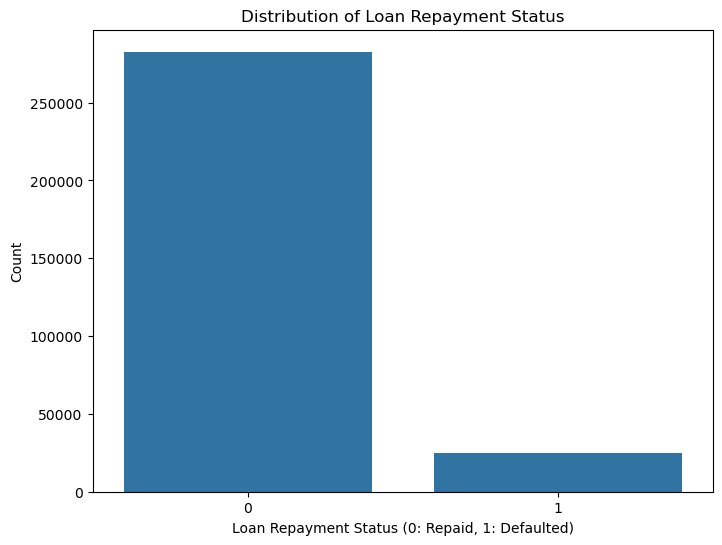

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of default vs. payer
target_counts = df['TARGET'].value_counts()
percentage_default = (target_counts[1] / len(df)) * 100
percentage_payer = (target_counts[0] / len(df)) * 100

print(f"Percentage of loans not repaid (default): {percentage_default:.2f}%") # Corresponds to TARGET = 1
print(f"Percentage of loans repaid (payer): {percentage_payer:.2f}%") # Corresponds to TARGET = 0

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=df)
plt.title('Distribution of Loan Repayment Status')
plt.xlabel('Loan Repayment Status (0: Repaid, 1: Defaulted)')
plt.ylabel('Count')
plt.show()

As the project statement suggests, the dataset is **highly imbalanced**, with far more loans being repaid than defaulted on. This can bias a model, making it great at predicting repayments but terrible at predicting defaults.

-----

### 4\. Balance the Dataset

To fix the imbalance, we can use an over-sampling technique like **SMOTE** (Synthetic Minority Over-sampling Technique). SMOTE creates new, synthetic data points for the minority class (defaulters) instead of just duplicating existing ones.

*For this step, we first need to handle categorical data and missing values.* A full preprocessing script is complex, so here's a simplified version focusing on the key steps.

/var/folders/s2/27sql4252pl0vvdtvt84wd5w0000gn/T/ipykernel_30399/2912493656.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
/var/folders/s2/27sql4252pl0vvdtvt84wd5w0000gn/T/ipykernel_30399/2912493656.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Data successfully preprocessed and split!
Shape of X_train: (246008, 15)
Shape of training data before SMOTE: (246008, 15)
Shape of training data after SMOTE: (452296, 15)


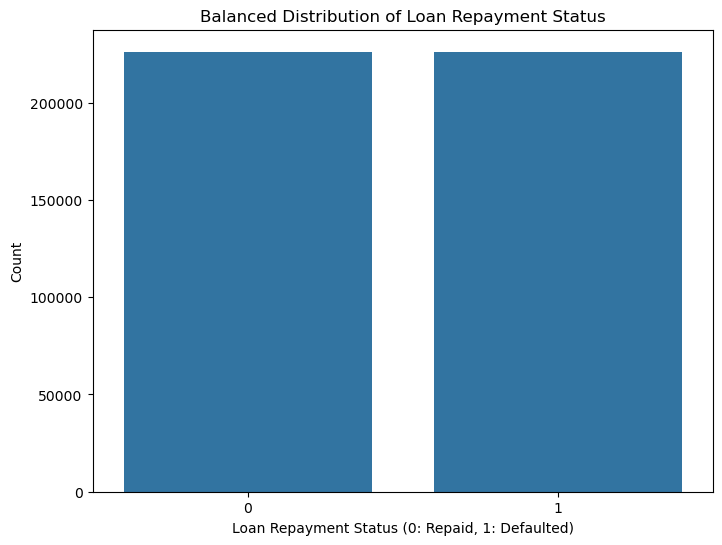

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



# 1. Select a mix of numerical and categorical features
numerical_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'EXT_SOURCE_2']
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE']

X = df[numerical_features + categorical_features].copy()
y = df['TARGET']

# 2. Handle missing values
for col in numerical_features:
    X[col].fillna(X[col].median(), inplace=True)
for col in categorical_features:
    X[col].fillna(X[col].mode()[0], inplace=True)

# 3. Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# 4. Now, split the new encoded data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully preprocessed and split!")
print("Shape of X_train:", X_train.shape)
# --- Apply SMOTE ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of training data before SMOTE:", X_train.shape)
print("Shape of training data after SMOTE:", X_train_resampled.shape)

# --- Plot the balanced data --- 
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Balanced Distribution of Loan Repayment Status')
plt.xlabel('Loan Repayment Status (0: Repaid, 1: Defaulted)')
plt.ylabel('Count')
plt.show()

-----

### 5\. Build and Train the Deep Learning Model

Now we can build our deep learning model using TensorFlow and Keras. We'll create a simple neural network for this binary classification task.

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(
    X_train_scaled,
    y_train_resampled,
    epochs=10, # For demonstration; more epochs may be needed
    batch_size=256,
    validation_split=0.2,
    verbose=1
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.7843 - loss: 0.4494 - val_accuracy: 0.6885 - val_loss: 0.4927
Epoch 2/10
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.8062 - loss: 0.4097 - val_accuracy: 0.6793 - val_loss: 0.4922
Epoch 3/10
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.8077 - loss: 0.4067 - val_accuracy: 0.6581 - val_loss: 0.5132
Epoch 4/10
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.8081 - loss: 0.4066 - val_accuracy: 0.6602 - val_loss: 0.5095
Epoch 5/10
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.8089 - loss: 0.4040 - val_accuracy: 0.6848 - val_loss: 0.4843
Epoch 6/10
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.8092 - loss: 0.4045 - val_accuracy: 0.6863 - val_loss: 0.4929
Epoch 7/10
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.8090 - loss: 0.4042 - val_accuracy: 0.6696 - val_loss: 0.5060
Epoch 8/10
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.8093 -

-----

### 6\. Evaluate Model Performance

After training, we evaluate the model using the test set.We'll focus on **sensitivity** and the **AUC-ROC curve** as requested.

#### **Sensitivity (Recall)**

**Sensitivity** measures the model's ability to correctly identify positive cases (i.e., actual loan defaults). It's a crucial metric for imbalanced datasets. It's calculated as:

$$\text{Sensitivity (Recall)} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

#### **Area Under the ROC Curve (AUC-ROC)**

The **AUC-ROC curve** is a performance measurement for classification problems. It tells us how well the model is capable of distinguishing between classes (defaulters vs. payers). An AUC closer to 1 is better.

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step
Model Sensitivity (Recall): 0.2083
Area Under the ROC Curve (AUC): 0.6649


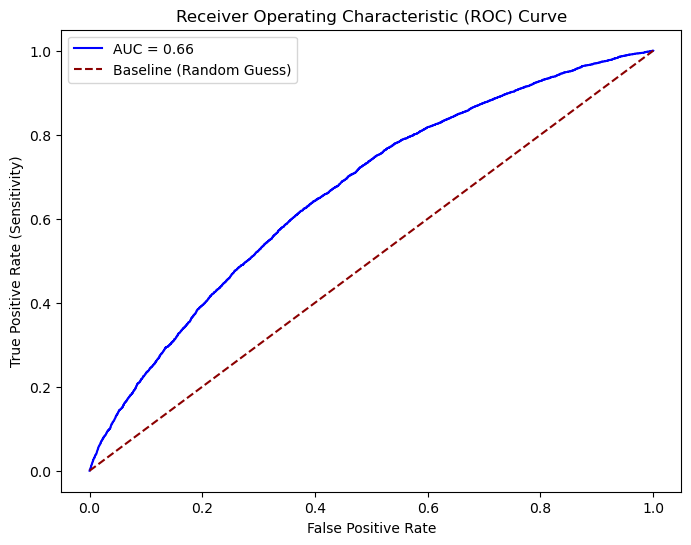

In [12]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, recall_score

# Make predictions on the test data
y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred_class = (y_pred_proba > 0.5).astype(int) # Convert probabilities to class labels (0 or 1)

# 1. Calculate Sensitivity (Recall) 
sensitivity = recall_score(y_test, y_pred_class)
print(f"Model Sensitivity (Recall): {sensitivity:.4f}")

# 2. Calculate the Area Under the ROC Curve (AUC)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Area Under the ROC Curve (AUC): {auc_score:.4f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='darkred', linestyle='--', label='Baseline (Random Guess)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()